#Notebook 2 - Model Building

The following notebook will build three different models to predict the outcome of a match from the provided data. It will then discuss the performance of these models using evaluation techniques, additional data that may improve the performance of the model, and how the model could be used in betting situations.

Note: Please make sure 'data_final.csv', which was made in notebook 1 and attached with the rest of the files, is present in the same folder as this notebook, if you wish to run the notebook again.

In [ ]:
#import libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import math as math

In [ ]:
#upload data

data_final = pd.read_csv('data_final.csv')
data_final.drop(columns=data_final.columns[0], axis=1, inplace=True) #drop index column from csv file
data_final

,match_id,tourney_id,tourney_name,tourney_level,surface,match_num,best_of,round,minutes,num_sets,...,player2_firstwon,player1_secondwon,player2_secondwon,player1_svgms,player2_svgms,player1_svpt,player2_svpt,winner_player_id,loser_player_id,result
0,0,0,77,0,1,1,3.0,5,162.0,3,...,56,31,29,17,16,110,126,124,106,1
1,1,0,77,0,1,2,3.0,5,86.0,2,...,25,17,16,10,10,57,67,378,202,1
2,2,0,77,0,1,3,3.0,5,64.0,2,...,22,11,10,8,8,46,65,1030,1193,0
3,3,0,77,0,1,4,3.0,5,150.0,3,...,35,21,24,15,15,109,104,574,689,0
4,4,0,77,0,1,5,3.0,5,60.0,2,...,22,10,16,8,9,47,50,585,53,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
46944,47735,2562,29,2,3,2,3.0,7,136.0,4,...,42,20,16,13,14,96,104,1004,265,1
46945,47736,2563,29,2,3,1,5.0,7,118.0,3,...,38,22,9,13,13,83,82,548,814,0
46946,47737,2563,29,2,3,2,5.0,7,164.0,4,...,68,17,25,19,19,113,139,629,491,1
46947,47738,2563,29,2,3,4,3.0,7,73.0,2,...,31,14,14,10,11,76,58,1166,17,1


In [ ]:
data_final = data_final.sample(frac=1) #reorder dataframe so train-test split have an equal distribution
data_final = data_final.reset_index(drop=True) #CSV file from notebook makes index a column

In [ ]:
def normalize(df):
    '''
    This function takes all columns of a dataframe and normalizes the values between 0 and 1.
    Input:
        df - dataframe to be normalized
    Output:
        df - normalized dataframe
    '''
    result = df.copy() #creating a copy of the dataframe
    for column in df.columns:
        max_value = df[column].max()
        min_value = df[column].min()
        result[column] = (df[column] - min_value) / (max_value - min_value) #values scaled
    return result

data_final = normalize(data_final)
data_final #Normalized dataframe

,match_id,tourney_id,tourney_name,tourney_level,surface,match_num,best_of,round,minutes,num_sets,...,player2_firstwon,player1_secondwon,player2_secondwon,player1_svgms,player2_svgms,player1_svpt,player2_svpt,winner_player_id,loser_player_id,result
0,0.757159,0.726102,0.065041,0.8,1.000000,0.176101,1.0,0.375,0.105862,0.6,...,0.190141,0.317073,0.158416,0.177778,0.175824,0.201629,0.194274,0.450867,0.111833,1.0
1,0.952953,0.943426,0.577236,0.0,0.333333,0.905660,0.0,0.500,0.096238,0.6,...,0.105634,0.158537,0.158416,0.144444,0.142857,0.185336,0.175869,0.479046,0.408369,1.0
2,0.659356,0.647288,0.902439,0.8,1.000000,0.371069,1.0,0.500,0.137358,0.8,...,0.144366,0.292683,0.257426,0.211111,0.197802,0.228106,0.212679,0.079480,0.192641,0.0
3,0.674312,0.654702,0.975610,0.8,0.666667,0.069182,1.0,0.375,0.118110,0.6,...,0.165493,0.182927,0.188119,0.177778,0.175824,0.209776,0.198364,0.871387,0.611833,1.0
4,0.822786,0.819742,0.528455,1.0,1.000000,0.000000,0.0,0.375,0.099738,0.6,...,0.126761,0.219512,0.227723,0.144444,0.153846,0.144603,0.208589,0.540462,0.816017,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
46944,0.502503,0.481467,0.170732,1.0,1.000000,0.075472,0.0,0.625,0.104112,0.6,...,0.105634,0.219512,0.207921,0.166667,0.164835,0.175153,0.186094,0.315751,0.820346,0.0
46945,0.577033,0.547796,0.699187,1.0,0.333333,0.003145,0.0,0.750,0.051619,0.4,...,0.073944,0.073171,0.108911,0.077778,0.087912,0.101833,0.092025,0.817919,0.577922,1.0
46946,0.324703,0.303941,0.170732,1.0,1.000000,0.012579,0.0,0.750,0.056868,0.4,...,0.102113,0.085366,0.108911,0.100000,0.109890,0.112016,0.096115,0.913295,0.388167,1.0
46947,0.222250,0.194304,0.975610,0.8,0.666667,0.062893,1.0,0.375,0.083115,0.6,...,0.095070,0.158537,0.217822,0.122222,0.109890,0.144603,0.149284,0.009393,0.009380,1.0


In [ ]:
#creating x and y data
y_data = data_final['result'] #the result of the match
x_data = data_final.drop('result', axis=1) #drop result column from dataframe
x_data

,match_id,tourney_id,tourney_name,tourney_level,surface,match_num,best_of,round,minutes,num_sets,...,player1_firstwon,player2_firstwon,player1_secondwon,player2_secondwon,player1_svgms,player2_svgms,player1_svpt,player2_svpt,winner_player_id,loser_player_id
0,0.757159,0.726102,0.065041,0.8,1.000000,0.176101,1.0,0.375,0.105862,0.6,...,0.126712,0.190141,0.317073,0.158416,0.177778,0.175824,0.201629,0.194274,0.450867,0.111833
1,0.952953,0.943426,0.577236,0.0,0.333333,0.905660,0.0,0.500,0.096238,0.6,...,0.109589,0.105634,0.158537,0.158416,0.144444,0.142857,0.185336,0.175869,0.479046,0.408369
2,0.659356,0.647288,0.902439,0.8,1.000000,0.371069,1.0,0.500,0.137358,0.8,...,0.188356,0.144366,0.292683,0.257426,0.211111,0.197802,0.228106,0.212679,0.079480,0.192641
3,0.674312,0.654702,0.975610,0.8,0.666667,0.069182,1.0,0.375,0.118110,0.6,...,0.147260,0.165493,0.182927,0.188119,0.177778,0.175824,0.209776,0.198364,0.871387,0.611833
4,0.822786,0.819742,0.528455,1.0,1.000000,0.000000,0.0,0.375,0.099738,0.6,...,0.102740,0.126761,0.219512,0.227723,0.144444,0.153846,0.144603,0.208589,0.540462,0.816017
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
46944,0.502503,0.481467,0.170732,1.0,1.000000,0.075472,0.0,0.625,0.104112,0.6,...,0.116438,0.105634,0.219512,0.207921,0.166667,0.164835,0.175153,0.186094,0.315751,0.820346
46945,0.577033,0.547796,0.699187,1.0,0.333333,0.003145,0.0,0.750,0.051619,0.4,...,0.051370,0.073944,0.073171,0.108911,0.077778,0.087912,0.101833,0.092025,0.817919,0.577922
46946,0.324703,0.303941,0.170732,1.0,1.000000,0.012579,0.0,0.750,0.056868,0.4,...,0.085616,0.102113,0.085366,0.108911,0.100000,0.109890,0.112016,0.096115,0.913295,0.388167
46947,0.222250,0.194304,0.975610,0.8,0.666667,0.062893,1.0,0.375,0.083115,0.6,...,0.089041,0.095070,0.158537,0.217822,0.122222,0.109890,0.144603,0.149284,0.009393,0.009380


In [ ]:
train_size = math.floor(len(x_data)*0.8) #size of our train data set
print(f" {train_size} is length of training dataset")
test_size = len(x_data) - train_size #size of our test data set
print(f" {test_size} is length of testing dataset")

#making the train-test split (80 - 20)

#training data
x_train = x_data[:train_size]
y_train = y_data[:train_size]

#testing data
x_test = x_data[train_size:]
y_test = y_data[train_size:]

 37559 is length of training dataset
 9390 is length of testing dataset


# Logistic Regression

In [ ]:
#Logistic Regression
from sklearn.linear_model import LogisticRegression
model = LogisticRegression() #initialize logistic regression model

#Creating a grid of paramters that need to be searched through by GridSearch
param_grid = [{'penalty' : ['l1', 'l2'],
               'C' : np.logspace(-4, 4, 10),
               'solver' : ['liblinear','saga'],
               'max_iter' : [20]}]

from sklearn.model_selection import GridSearchCV #import GridSearch
grid_search = GridSearchCV(model, param_grid, cv=5, scoring='accuracy', n_jobs=-1, verbose = 1)
grid_search.fit(x_train, y_train) #find best parameter
print(f'Best parameters: {grid_search.best_params_}')
print(f'Best score: {grid_search.best_score_}') #Training Accuracy

Fitting 5 folds for each of 40 candidates, totalling 200 fits
Best parameters: {'C': 10000.0, 'max_iter': 20, 'penalty': 'l2', 'solver': 'liblinear'}
Best score: 0.9997071210715587


In [ ]:
from sklearn.metrics import classification_report #import classification report
best_model = grid_search.best_estimator_ #best model found
y_test = y_test.to_numpy()
y_pred_test = best_model.predict(x_test) # result predicted by our model
print(classification_report(y_test, y_pred_test))

#print out all wrong values
wrong_num = 0
for i in range(len(y_pred_test)):
  if y_pred_test[i] != y_test[i]:
    wrong_num += 1
  else:
    pass

print(f"Number of wrong predictions: {wrong_num}")

              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00      4640
         1.0       1.00      1.00      1.00      4750

    accuracy                           1.00      9390
   macro avg       1.00      1.00      1.00      9390
weighted avg       1.00      1.00      1.00      9390

Number of wrong predictions: 5


Text(0.5, 1.0, 'Logistic Regression ROC Curve')

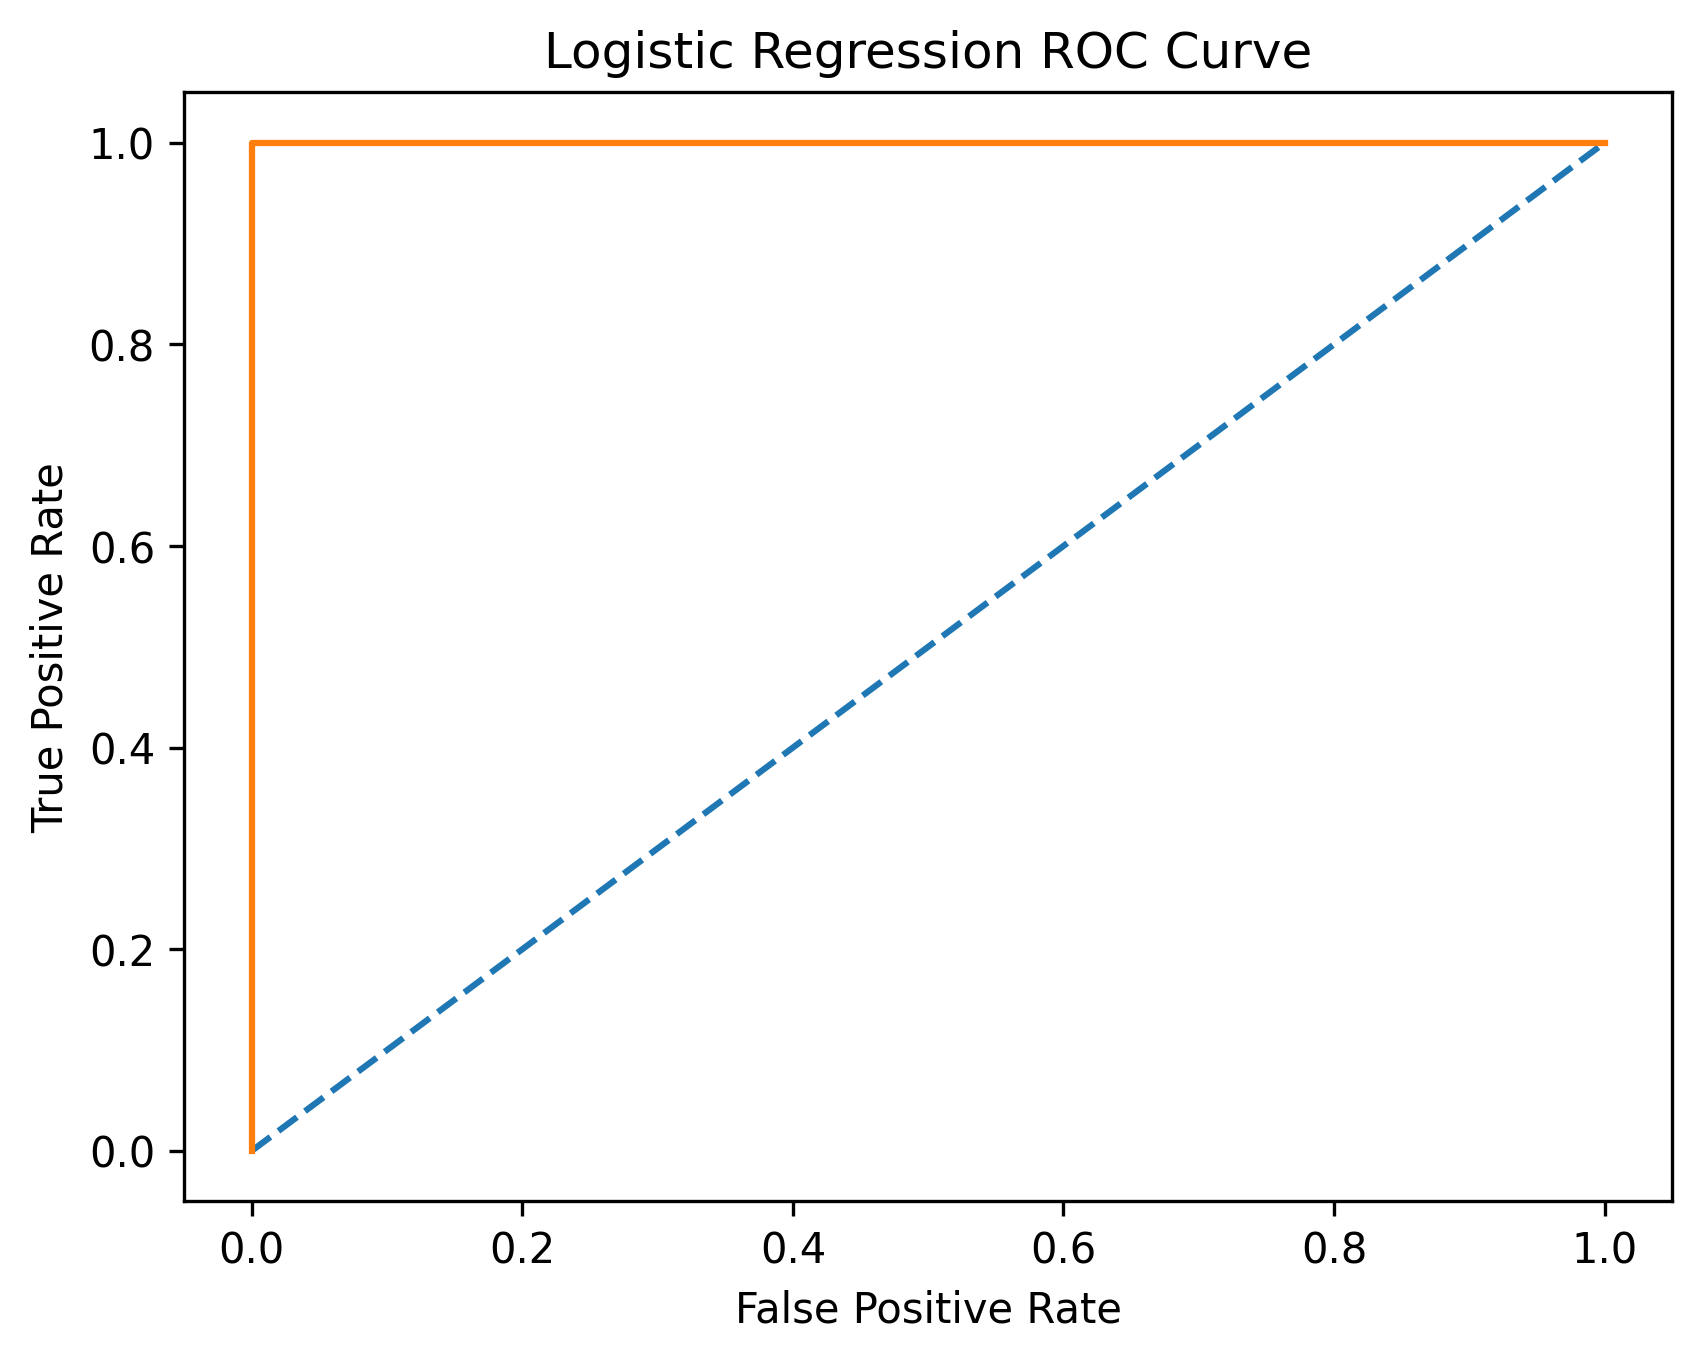

In [ ]:
from sklearn.metrics import roc_curve
y_pred_prob = best_model.predict_proba(x_test)[:,1] #probability of each class
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob) #false positive rate, true positive rate, thresholds
#ROC Curve
plt.figure(dpi = 300)
plt.plot([0,1], [0,1], '--') #random predictions curve
plt.plot(fpr, tpr)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Logistic Regression ROC Curve')

# SVM

In [ ]:
#SVM
from sklearn import svm
model_svm = svm.SVC(probability=True) #initialize support vector machine model

#search through paramaters for best model
param_grid_svm = {'C': np.logspace(-2, 4, 10),
                  'gamma': [0.1],
                  'kernel': ['rbf'],
                  'max_iter': [200]}
grid_search_svm = GridSearchCV(model_svm, param_grid_svm, cv=5, scoring='accuracy', n_jobs=-1, verbose = 1)
grid_search_svm.fit(x_train, y_train) #find best parameter
print(f'Best parameters: {grid_search_svm.best_params_}')
print(f'Best score: {grid_search_svm.best_score_}') #training accuracy

Fitting 5 folds for each of 10 candidates, totalling 50 fits
Best parameters: {'C': 21.54434690031882, 'gamma': 0.1, 'kernel': 'rbf', 'max_iter': 200}
Best score: 0.9847172779887334


/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=200).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


In [ ]:
best_model_svm = grid_search_svm.best_estimator_
y_pred_test_svm = best_model_svm.predict(x_test) #result predicted by model
print(classification_report(y_test, y_pred_test_svm)) #classification report

#print wrong and actual values
wrong_num = 0
for i in range(len(y_pred_test_svm)):
  if y_pred_test_svm[i] != y_test[i]:
    wrong_num += 1
  else:
    pass

print(f"Number of wrong predictions: {wrong_num}")

              precision    recall  f1-score   support

         0.0       0.99      0.99      0.99      4640
         1.0       0.99      0.99      0.99      4750

    accuracy                           0.99      9390
   macro avg       0.99      0.99      0.99      9390
weighted avg       0.99      0.99      0.99      9390

Number of wrong predictions: 115


Text(0.5, 1.0, 'SVM ROC Curve')

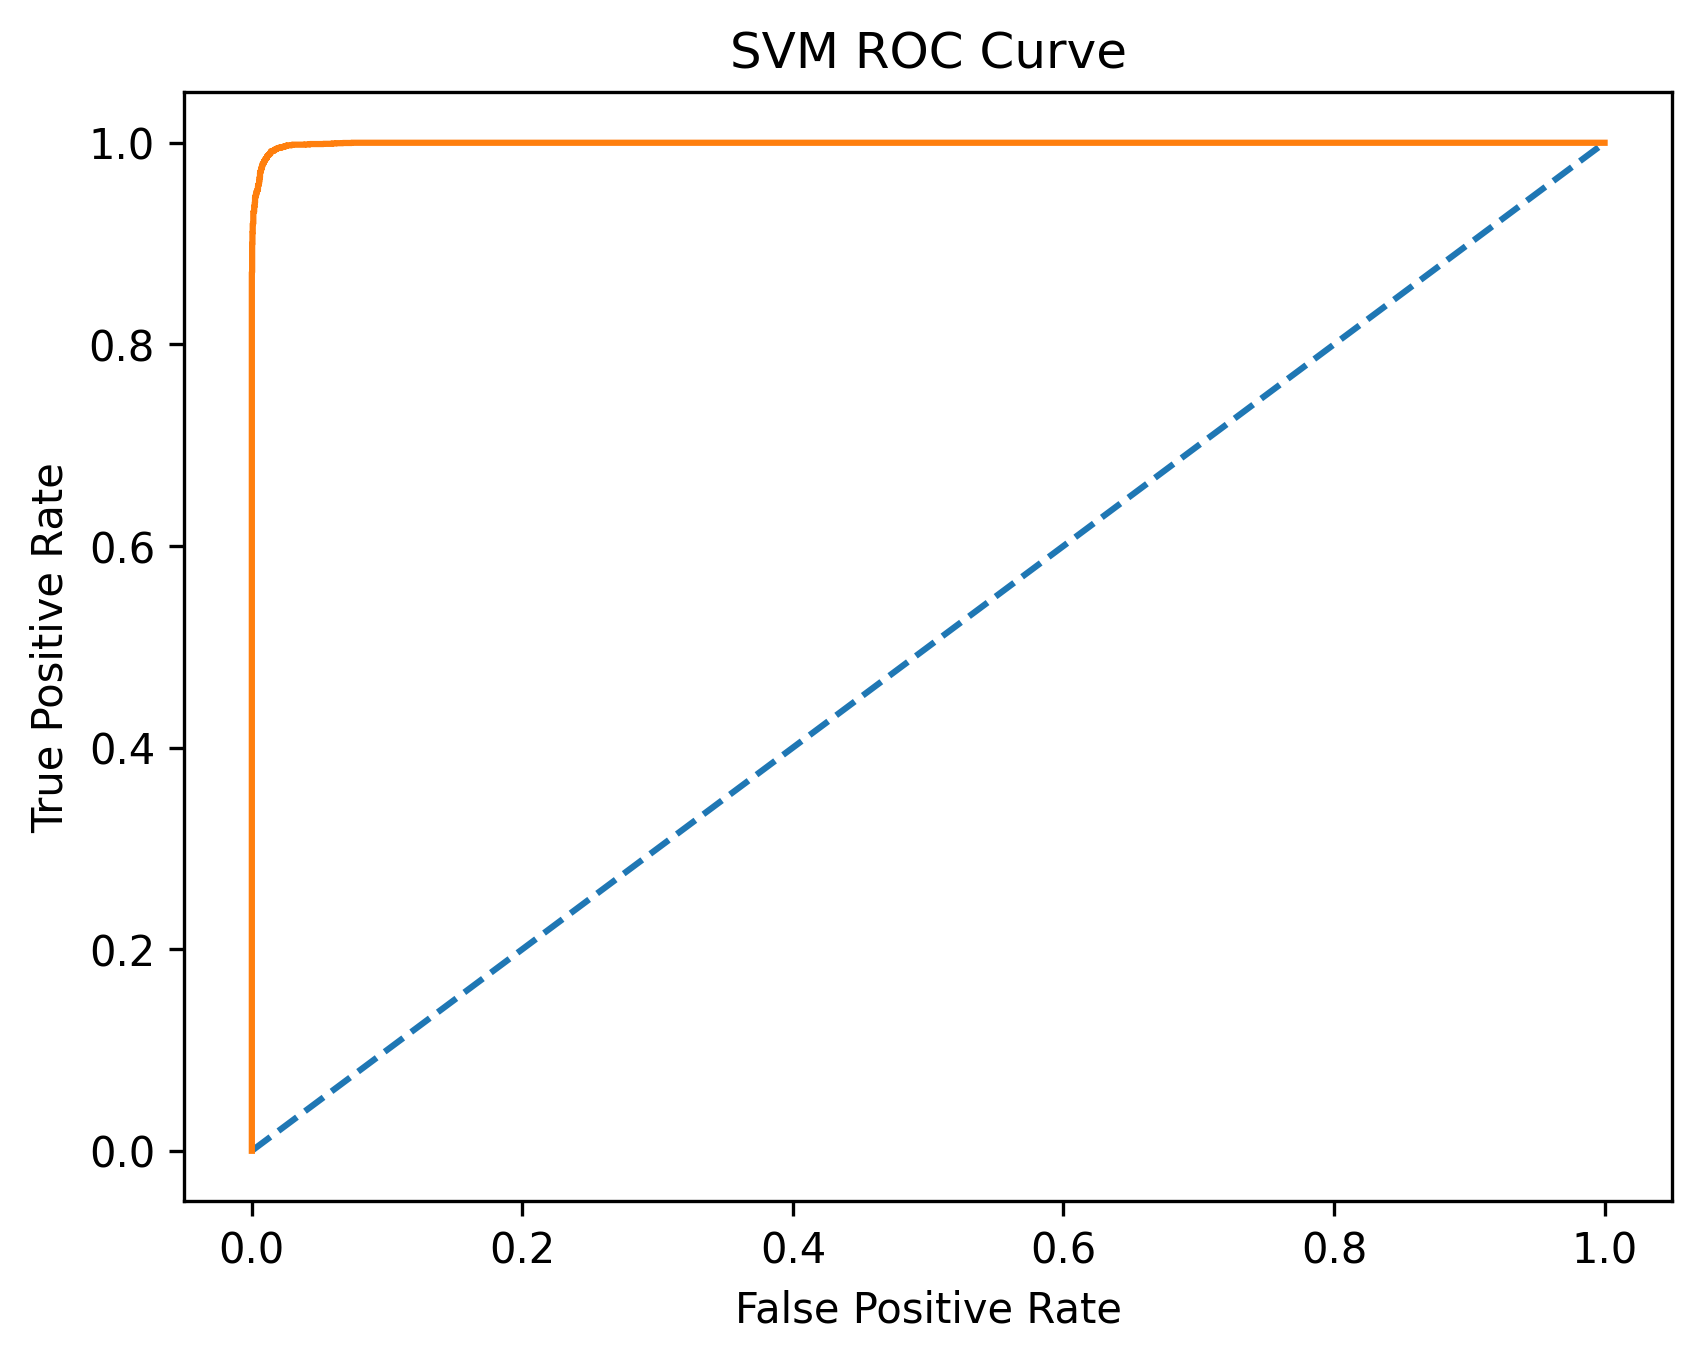

In [ ]:
y_pred_prob_svm = best_model_svm.predict_proba(x_test)[:,1] #probability of each class
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob_svm) #false positive rate, true positive rate, thresholds
#ROC Curve
plt.figure(dpi = 300)
plt.plot([0,1], [0,1], '--') #random predictions curve
plt.plot(fpr, tpr)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('SVM ROC Curve')

# Neural Network

In [ ]:
# TensorFlow and tf.keras
import tensorflow as tf
from tensorflow import keras
from keras.layers import Dropout, Dense, Input

In [ ]:
#Create network
model_nn = tf.keras.Sequential()
model_nn.add(Input(shape = x_train.shape[1]))
model_nn.add(Dense(128, activation='relu')) #first layer
model_nn.add(Dropout(0.2)) #dropout layer
model_nn.add(Dense(1, activation='sigmoid')) #output layer

In [ ]:
#compile
model_nn.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])
#train model
model_nn.fit(x_train, y_train, epochs=50, batch_size=128)

Epoch 1/50
294/294 [==============================] - 1s 2ms/step - loss: 0.3232 - accuracy: 0.9111
Epoch 2/50
294/294 [==============================] - 1s 3ms/step - loss: 0.0999 - accuracy: 0.9780
Epoch 3/50
294/294 [==============================] - 1s 3ms/step - loss: 0.0574 - accuracy: 0.9886
Epoch 4/50
294/294 [==============================] - 1s 4ms/step - loss: 0.0397 - accuracy: 0.9915
Epoch 5/50
294/294 [==============================] - 1s 4ms/step - loss: 0.0305 - accuracy: 0.9933
Epoch 6/50
294/294 [==============================] - 1s 4ms/step - loss: 0.0249 - accuracy: 0.9946
Epoch 7/50
294/294 [==============================] - 2s 7ms/step - loss: 0.0213 - accuracy: 0.9951
Epoch 8/50
294/294 [==============================] - 1s 3ms/step - loss: 0.0177 - accuracy: 0.9956
Epoch 9/50
294/294 [==============================] - 1s 3ms/step - loss: 0.0162 - accuracy: 0.9961
Epoch 10/50
294/294 [==============================] - 1s 3ms/step - loss: 0.0147 - accuracy: 0.9962

In [ ]:
test_loss, test_acc = model_nn.evaluate(x_test, y_test) #evaluate model

y_pred_test_nn = model_nn.predict(x_test)
y_pred_test_nn = np.where(y_pred_test_nn > 0.5, 1, 0) #set threshold to 0.5
print(classification_report(y_test, y_pred_test_nn)) #classification report

#print wrong and actual values
wrong_num = 0
for i in range(len(y_pred_test_nn)):
  if y_pred_test_nn[i] != y_test[i]:
    wrong_num += 1
  else:
    pass

print(f"Number of wrong predictions: {wrong_num}")

294/294 [==============================] - 1s 2ms/step
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00      4640
         1.0       1.00      1.00      1.00      4750

    accuracy                           1.00      9390
   macro avg       1.00      1.00      1.00      9390
weighted avg       1.00      1.00      1.00      9390

Number of wrong predictions: 17


294/294 [==============================] - 1s 2ms/step


Text(0.5, 1.0, 'NN ROC Curve')

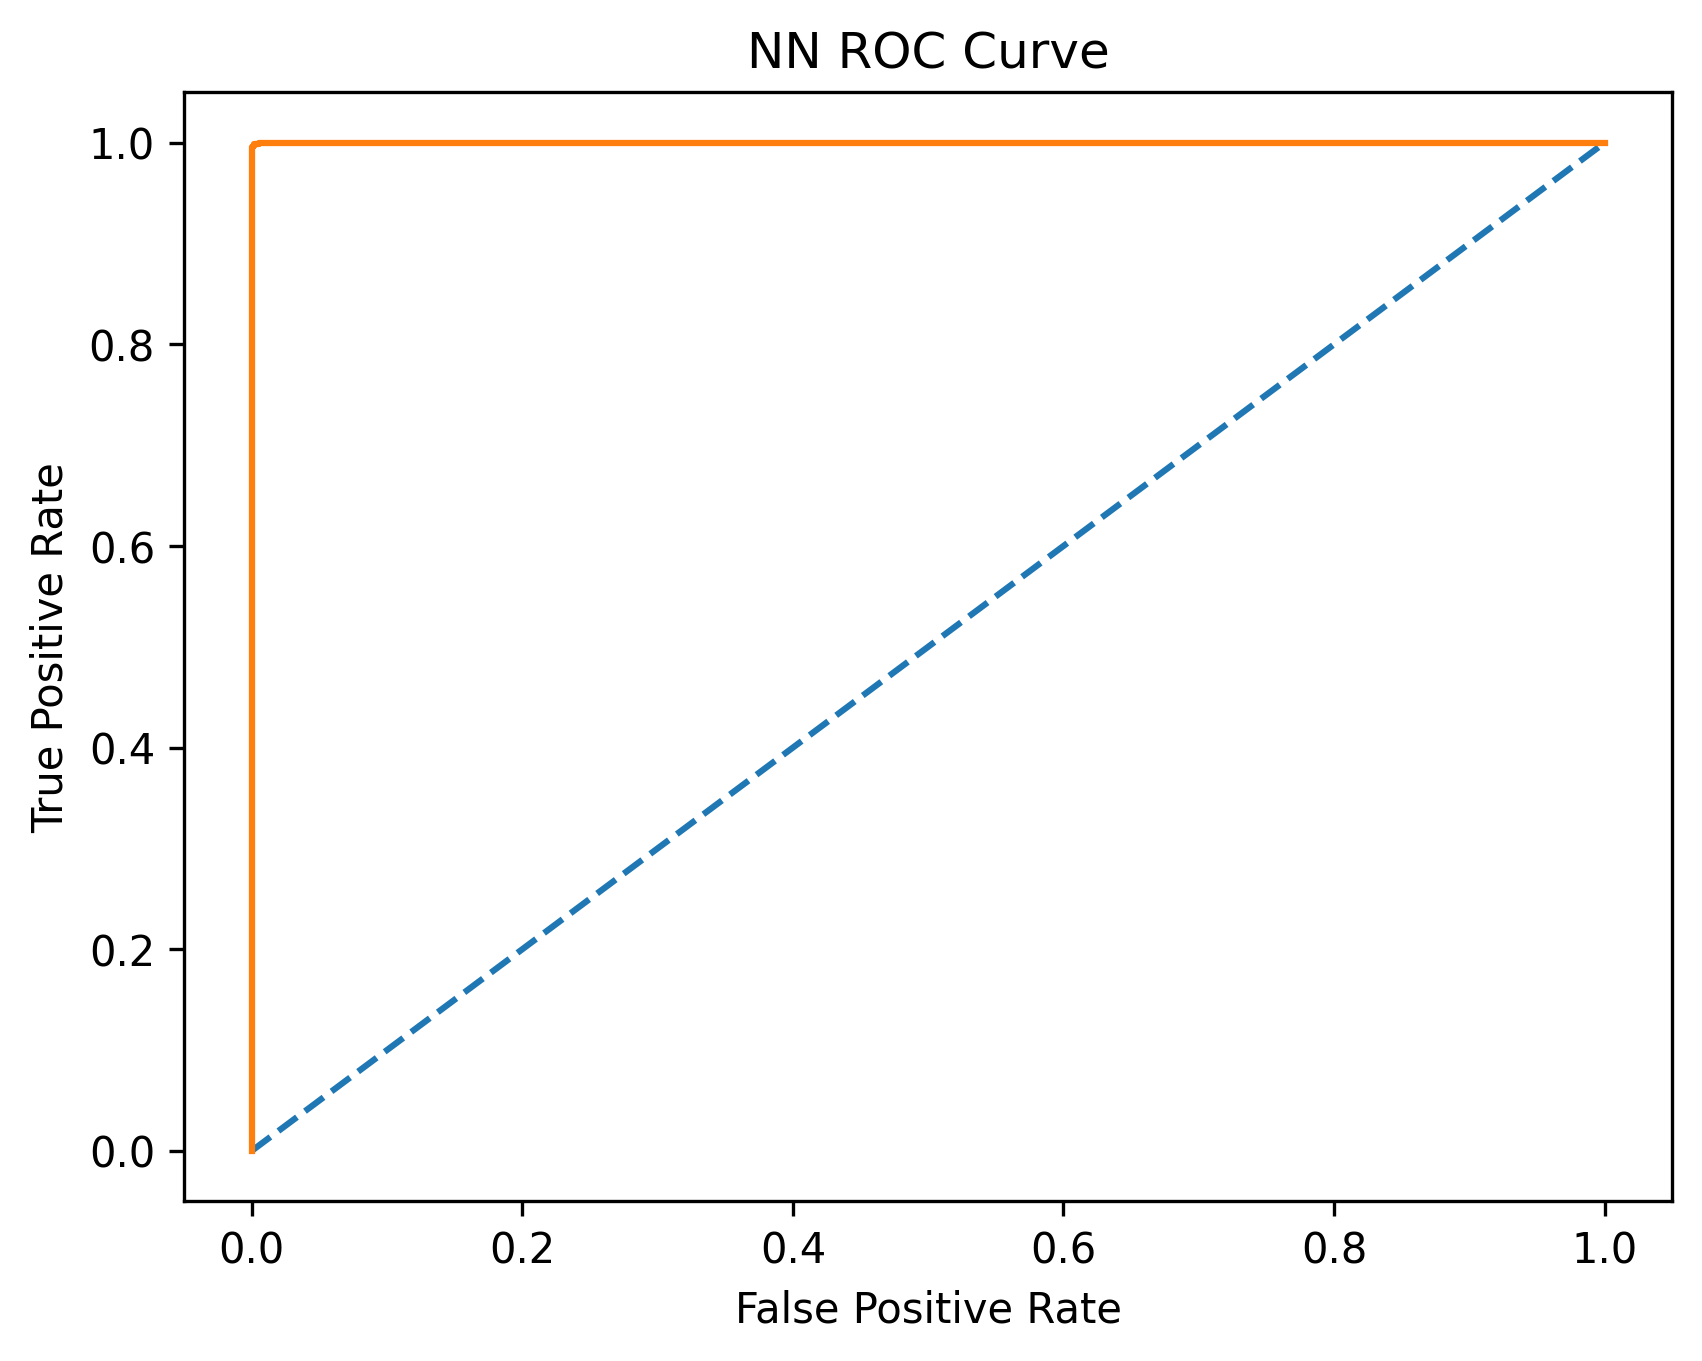

In [ ]:
y_pred_prob_nn = model_nn.predict(x_test) #probability of each class
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob_nn) #false positive rate, true positive rate, thresholds
#ROC Curve
plt.figure(dpi = 300)
plt.plot([0,1], [0,1], '--') #random predictions curve
plt.plot(fpr, tpr)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('NN ROC Curve')

# Discussion

- Data: What additional data could we use to improve our model’s accuracy?
  - I believe that utilizing older records along with our current data would improve the performance of the algorithm. For our purposes, which is predicting the outcome of current matches, the timeframe of the data given for this task is understandable. After all, no player playing 30 years ago will still be playing today. However, while a model may never use information about an old player, it could use learned relations between other variables to predict outcomes.
 - A glaring problem with the current data is the amount of variables that are found out only after the game has been finished. As such, when these variables are removed, the performance of the model is sure to get worse. One of the best ways to tackle this when deploying these models is to increase our training data.

- Modelling: If you had more time, what additional modelling steps would you take?
  - For the models constructed, outliers were included in the dataset. The reason this was done is because games are affected by immesaurable variables such as a player's mood, external situation, injury, slump etc. Hence, I believed that including outliers might be beneficial for the model. However, given more time, I would build a model after accounting for outliers and observe if it performs better.
  - A further step I would take is getting rid of post-match variables and modelling only pre-match data. I would rebuild the above models with only this data, also trying new models such as XGboost.
  - A model that I believe will give the best accuracy when trying to predict current games is using an ensemble learning model. This could contain many models—models trained on all data, models trained on only pre match data, and models trained on old and new data.

- Model evaluation: How would you do it?
  - I decided to implement most ways of evaluating binary classification models. Namely, the accuracy, precision, recall, and f1 score. I also plotted the ROC curve for each model. An extension would be to find the AUC for each ROC curve.
  - Additionally, these models could be run on pre-match data (with post match data filled with averages) to see how they would perform when predicting current games. The same evaluation methods mentioned above could then be used to evaluate its performance.

-  Betting strategies: How would you use your model in practice?
  - With betting, while the final predicted result is important, it is also important to look at the probability of the result. If the model predicts a probability close to the threshold, there is a good chance the match could go either way. When the probability is on extreme ends, it would be safest to make a bet that matches with the prediction of the model.
